In [1]:
import os

os.environ["DYLD_LIBRARY_PATH"] = "/usr/local/lib:/usr/local/opt/libomp/lib:/usr/local/opt/hdf5/lib"
os.environ["OPENMC_CROSS_SECTIONS"] = "/Users/sa39262-admin/xs_data/endfb-viii.0-hdf5/cross_sections.xml"
os.environ['PYTHONPATH'] = '/Users/sa39262-admin/Documents/modeling/vr1-openmc'

In [2]:
import sys
sys.path.append('/Users/sa39262-admin/Documents/modeling/vr1-openmc')

In [3]:
import openmc
import matplotlib.pyplot as plt

In [4]:
from vr1.core import TestLattice
from vr1.materials import VR1Materials
from vr1.VR1facility import Facility
from vr1.settings import SettingsOpenMC

In [5]:
materials = VR1Materials()

In [6]:
mats = materials.get_materials()

# this should generate a materials.xml file in the current directory
# doesn't seem to be doing it? double check materials.xml file exists!

In [7]:
lattice = [
    ["6", "6"],
    ["6", "8"],
    ["4", "6"]
]

In [8]:
lattice = TestLattice(materials, lattice)

In [9]:
facility = Facility(materials=materials)

In [10]:
facility_universe = facility.build(lattice)

In [11]:
geo = openmc.Geometry(root=facility_universe)
geo.export_to_xml()
mod = openmc.Model()
mod.geometry = geo

In [12]:
settings = SettingsOpenMC(
    name='VR1 Reactor Simulation',
    xs_lib='endf8.0',  # Using ENDF/B-VIII.0 as specified in environment
    xs_xml_root_path='/Users/sa39262-admin/xs_data'
)

settings_file = settings.setup_simulation(
    lattice=lattice,
    source_type='uniform'
)

   ✓ Uniform neutron source created over lattice region
   ✓ Settings XML exported to: ./settings.xml


/Users/sa39262-admin/Documents/modeling/vr1-openmc/.venv/lib/python3.12/site-packages/openmc/source.py:658: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

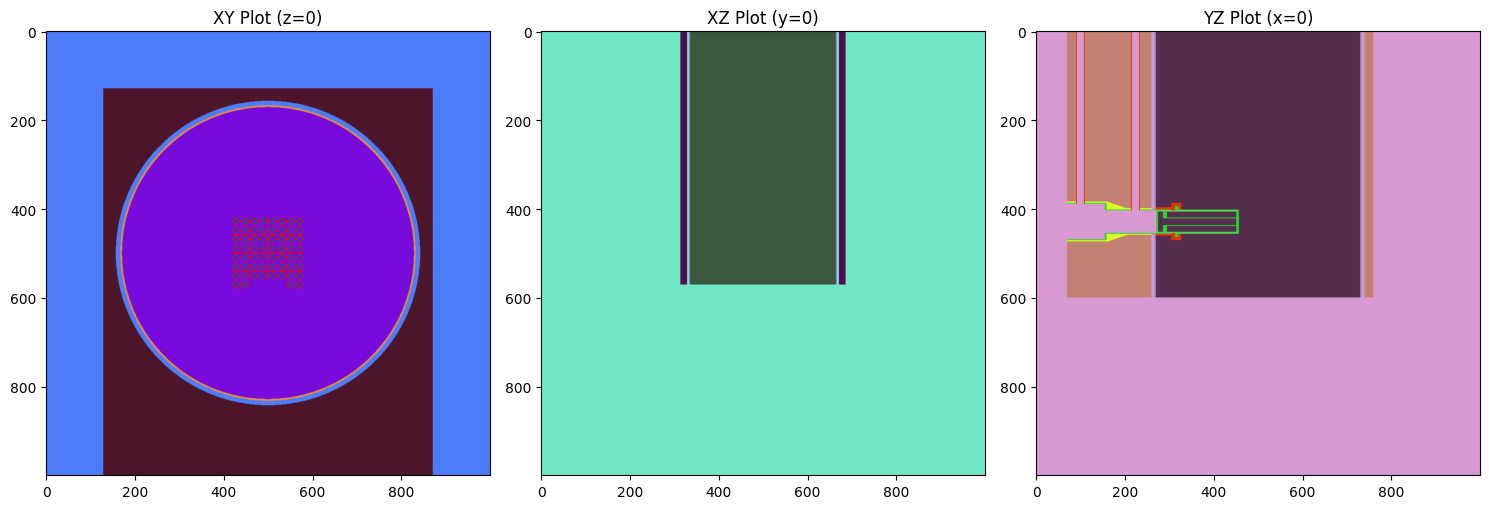

In [13]:
from vr1.plots import PlotManager

settings = {
    'resolution': 1000,
    # You can customize plot_defs if you want to only plot specific ones
}

plot_manager = PlotManager(mod, settings)
plot_manager.run_and_display(display_plots=True)  # Set to False if you don't want inline plots

In [16]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [15]:
ls

_old/                    plot_xz.png              statepoint.110.h5
geometry.xml             plot_yz.png              summary.h5
materials.xml            plots.xml                test.ipynb
plot_xy.png              settings.xml             vr1_simulation_setup.py
